In [236]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import pandas as pd

In [237]:
class neural_network():
    def __init__(self, input_nodes, output_nodes, learning_rate):
        self.inodes = input_nodes
        self.onodes = output_nodes
        self.lr = learning_rate

        self.w = np.zeros((1, 1))
        self.b = np.zeros((1, 1))

    def train(self, input, target):
        output = self.query(input)

        output_error = (output - target)/input.shape[1]
        
        d_w = np.dot(output_error, input.T)
        d_b = np.sum(output_error, axis = 1, keepdims = True)

        self.w -= self.lr * d_w
        self.b -= self.lr * d_b


    def query(self, input):
        output = np.dot(self.w, input) + self.b

        return output

In [238]:
inputnodes = 1
outputnodes = 1
learning_rate = 0.01

n = neural_network(inputnodes, outputnodes, learning_rate)

training_df = pd.read_csv("training_dataset/data.csv")

training_array = training_df.to_numpy()

array_1 = training_array[:,:1].T
array_2 = training_array[:,1:].T
print(array_1.shape)
print(type(array_2))
print(n.w, n.b)


(1, 96)
<class 'numpy.ndarray'>
[[0.]] [[0.]]


In [239]:
# train the neural network
epochs = 400
for i in range(epochs):
    n.train(array_1, array_2)

[ 3.42587973  6.43182593  4.90880247  3.75965041  6.29544327  5.38438298
  6.49162525  4.38920162  2.95039973  3.60980034 12.10562601  3.63321756
  6.32107155  3.53944819  3.27683368  4.26779391  3.02627954  4.33231688
  4.97674254  4.09060701 18.24234321  3.38809058  4.22829621  3.46326687
 16.91067759 10.76290505  8.88249269 11.11265572 20.18506747  3.14919479
  4.49292078  7.1650963   3.79181139  6.122779    5.84368199  6.00699947
  3.50487514 10.77094529  4.25573355  3.30447203  4.78749527  9.63727071
  3.67311727  5.73443515  4.99915472  2.9660782   3.70095662  9.62923047
  3.43984966  5.44850393  3.20477299  5.33161887  5.51172036  4.23502991
  4.26126121  4.17613512  3.53844316  7.2274082   7.37152959  6.74016933
  3.07572705 19.25641914 12.85336882 16.92474802  5.12488406  6.20720158
  8.15786558  3.39743736 18.31370039  8.05736251  5.24176912  3.9067869
  5.13262279  2.92256038  4.45121201  5.44689588  2.93220867  8.19605675
  3.00376685  3.62839341  3.08487283  4.25804512  7.

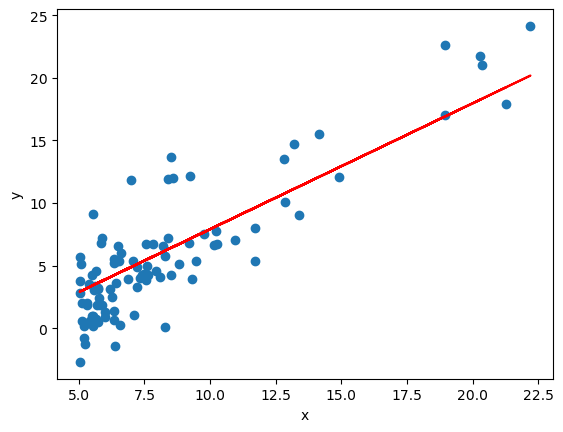

In [240]:

plt.scatter(array_1, array_2)
pre_array = np.dot(n.w, array_1) + n.b

plt.plot(array_1.reshape(-1), pre_array.reshape(-1), color = 'red')
print(pre_array.reshape(-1))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [241]:
print(n.w, n.b)

[[1.00503066]] [[-2.12962824]]
